* See how a single bit of leakage can translate to a byte key reveal
* We need know the internal operation

## Libs

In [1]:
import chipwhisperer as cw
import chipwhisperer.analyzer as cwa
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt

import chipwhisperer.common.api.lascar as cw_lascar
from lascar import *

import chipwhisperer.analyzer as cwa

## Load firmware

In [4]:
%run "1 - Recovering secret from a Singles Bits (HARDWARE).ipynb"

INFO: Found ChipWhisperer😍
SimpleSerial Settings =
	output_len             = 16
	baud                   = 38400
	simpleserial_last_read = 
	simpleserial_last_sent = 
	
ChipWhisperer Nano Device
fw_version = 
    major = 0
    minor = 65
    debug = 0
io = 
    tio1         = None
    tio2         = None
    tio3         = None
    tio4         = high_z
    pdid         = True
    pdic         = False
    nrst         = True
    clkout       = 7500000.0
    cdc_settings = bytearray(b'\x01\x00\x00\x00')
adc = 
    clk_src  = int
    clk_freq = 7500000.0
    samples  = 5000
glitch = 
    repeat     = 0
    ext_offset = 0

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc.exe (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Founda

Capturing data:   0%|          | 0/1000 [00:00<?, ?it/s]

textin_array[i][0]
0x4c
0x61
0xe1
textout_array[i][0]
0xa
0x1f
0x9f


## Data shape

In [5]:
print(np.shape(textin_array))

(1000, 16)


In [6]:
print(np.shape(textout_array))

(1000, 16)


## Known operation

In [7]:
def op_internal(inputdata, s):
    return ((inputdata + s) & 0x00FF)

In [8]:
assert(op_internal(0xAB, 0xBE) == 0x69)
assert(op_internal(0xA0, 0x0A) == 0xAA)
assert(op_internal(0xFF, 0x33) == 0x32)

## Leaked data
Build a new array called leaked_data which contains just the 1 or 0 status of the lowest bit result.

In [10]:
leaked_data = [(textout_array[i][0] & 0b10000001) for i in range(len(textout_array))]
print(np.shape(leaked_data))
print(leaked_data)

(1000,)
[0, 1, 129, 128, 129, 129, 128, 129, 0, 128, 129, 129, 0, 128, 1, 0, 128, 128, 128, 1, 129, 129, 0, 0, 129, 1, 128, 0, 1, 0, 129, 129, 128, 128, 0, 128, 0, 0, 1, 1, 1, 0, 1, 129, 129, 1, 128, 129, 0, 129, 1, 129, 1, 0, 0, 0, 129, 0, 0, 129, 1, 0, 1, 1, 0, 129, 129, 128, 129, 1, 0, 128, 128, 129, 1, 1, 0, 1, 1, 128, 129, 1, 0, 1, 0, 128, 129, 128, 129, 129, 0, 0, 129, 128, 129, 128, 1, 128, 129, 129, 1, 129, 1, 129, 129, 128, 0, 0, 129, 1, 1, 0, 128, 128, 1, 0, 128, 128, 0, 1, 129, 128, 0, 1, 128, 128, 129, 1, 128, 0, 0, 1, 1, 129, 1, 129, 0, 128, 0, 1, 128, 1, 0, 1, 1, 129, 1, 129, 129, 129, 128, 129, 128, 1, 0, 129, 1, 129, 129, 1, 1, 0, 1, 129, 0, 128, 0, 129, 1, 128, 1, 128, 129, 1, 128, 1, 0, 0, 129, 128, 129, 1, 128, 128, 129, 128, 128, 0, 1, 1, 1, 129, 128, 0, 128, 0, 129, 0, 129, 128, 0, 0, 1, 128, 0, 128, 128, 129, 128, 0, 129, 1, 128, 1, 0, 1, 128, 129, 0, 0, 129, 129, 128, 0, 129, 0, 1, 1, 1, 0, 0, 129, 129, 129, 0, 0, 128, 128, 129, 0, 129, 0, 129, 0, 0, 0, 1, 0, 128

<IPython.core.display.Javascript object>


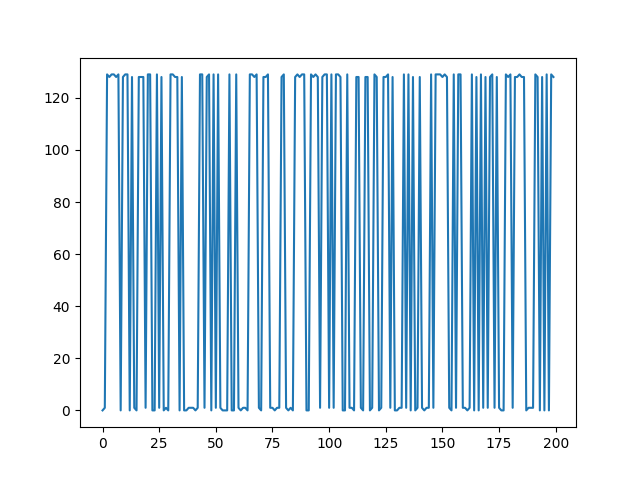

In [11]:
plt.plot(leaked_data[0:200])
plt.show()

### Input byte generation from textin_array
Get one byte from textin_array

In [12]:
input_data = []
for i in range(0, len(textin_array)): 
    input_data.append(textin_array[i][0])


In [13]:
assert(len(input_data)==len(textin_array))
assert((input_data[4])==(textin_array[4][0]))

In [ ]:
#print(input_data)

In [ ]:
#for i in range (0,1000):
#    print(textin_array[i][0])

### Num same function

In [14]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length! len(a) : ", len(a), " len(b) : ", len(b))

    #if max(a) != max(b):
    #    raise ValueError("Arrays max() should be the same! max(a) : ", max(a), " max(b) : ", max(b))
    
    same = 0
    for i in range(len(a)):
        if a[i] == b[i]:
            same += 1
    
    return same

## Secret Guesser

for each known input byte, pass it through the serial communication () 

In [15]:
hypothetical_leakage = []
guess_list = [0] * 256
for guess in range(0, 256):     
    #Get a hypothetical leakage list - use aes_internal(guess, input_byte) and mask off to only get value of lowest bit
    hypothetical_leakage = [(op_internal(inp, guess) & 0b10000001) for inp in input_data]
    
    #Use our function
    
    same_count = num_same(hypothetical_leakage, leaked_data) 
    guess_list[guess] = same_count
    sorted_list = np.argsort(guess_list)[::-1]
    
    #Print for debug
for guess in sorted_list[0:5]:
        print("Key Guess {:02X} = {:04d} matches".format(guess, guess_list[guess]))

Key Guess BE = 1000 matches
Key Guess C0 = 0986 matches
Key Guess BC = 0983 matches
Key Guess BA = 0968 matches
Key Guess C2 = 0965 matches
